In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
import pickle # it convert python objects in to whites stream 
import cv2
import os
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential, Model,load_model
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras 
import pandas as pd
import numpy as np
from glob import glob

In [3]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=.2,
    rotation_range=.2
    )                            
 
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
training_set=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    shuffle=True
    )

valid_set=valid_datagen.flow_from_directory(
    "/content/drive/MyDrive/Final_Project_CS331/Dataset/Val/",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    shuffle=True
    )
                                          
test_set=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/",
    target_size=(256,256),
    class_mode="categorical",
    batch_size=32,
    shuffle=True
    )                                   

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
labels = (training_set.class_indices)
n_classes = len(labels)

In [6]:
CNN_model = Sequential()
inputShape = (256, 256, 3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (3, 256, 256)
    chanDim = 1
CNN_model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
CNN_model.add(Activation("relu")) 
CNN_model.add(BatchNormalization(axis=chanDim))
CNN_model.add(MaxPooling2D(pool_size=(3, 3)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Conv2D(64, (3, 3), padding="same"))
CNN_model.add(Activation("relu"))
CNN_model.add(BatchNormalization(axis=chanDim))
CNN_model.add(Conv2D(64, (3, 3), padding="same"))
CNN_model.add(Activation("relu"))
CNN_model.add(BatchNormalization(axis=chanDim))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Conv2D(128, (3, 3), padding="same"))
CNN_model.add(Activation("relu"))
CNN_model.add(BatchNormalization(axis=chanDim))
CNN_model.add(Conv2D(128, (3, 3), padding="same"))
CNN_model.add(Activation("relu"))
CNN_model.add(BatchNormalization(axis=chanDim))
CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())
CNN_model.add(Dense(1024))
CNN_model.add(Activation("relu"))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(n_classes))
CNN_model.add(Activation("softmax"))

In [7]:
num_epochs = 25

In [8]:
#reduce loss
INIT_LR = 1e-3
opt = Adam(lr=INIT_LR, decay=INIT_LR / num_epochs)
# distribution
CNN_model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [10]:
transfer_CNN_model = CNN_model.fit(
    training_set,
    validation_data=valid_set,
    epochs=num_epochs,
    validation_steps=len(valid_set),
    steps_per_epoch=len(training_set)
    )

Epoch 1/25
250/250 [==============================] - 3272s 13s/step - loss: 1.1148 - accuracy: 0.6635 - val_loss: 7.8357 - val_accuracy: 0.1415
Epoch 2/25
250/250 [==============================] - 132s 529ms/step - loss: 0.6566 - accuracy: 0.7906 - val_loss: 3.5911 - val_accuracy: 0.4375
Epoch 3/25
250/250 [==============================] - 134s 537ms/step - loss: 0.5428 - accuracy: 0.8289 - val_loss: 3.9617 - val_accuracy: 0.3790
Epoch 4/25
250/250 [==============================] - 134s 537ms/step - loss: 0.4273 - accuracy: 0.8579 - val_loss: 0.5041 - val_accuracy: 0.8390
Epoch 5/25
250/250 [==============================] - 142s 570ms/step - loss: 0.3609 - accuracy: 0.8794 - val_loss: 0.9085 - val_accuracy: 0.7475
Epoch 6/25
250/250 [==============================] - 136s 543ms/step - loss: 0.2675 - accuracy: 0.9081 - val_loss: 1.2654 - val_accuracy: 0.7160
Epoch 7/25
250/250 [==============================] - 135s 538ms/step - loss: 0.2510 - accuracy: 0.9097 - val_loss: 1.4613 - 

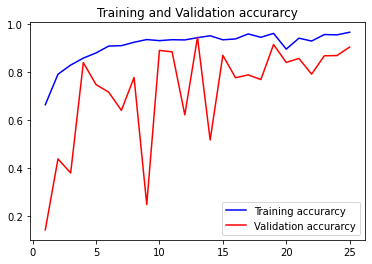

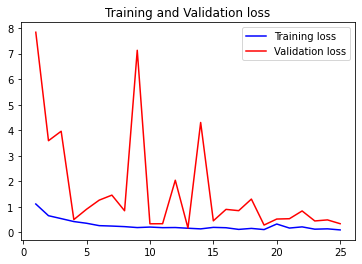

In [11]:
acc = transfer_CNN_model.history['accuracy']
val_acc = transfer_CNN_model.history['val_accuracy']
loss = transfer_CNN_model.history['loss']
val_loss = transfer_CNN_model.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [12]:
results = CNN_model.evaluate(test_set)

print("Test Loss    : {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

32/32 [==============================] - 320s 10s/step - loss: 0.3880 - accuracy: 0.8990
Test Loss    : 0.38803
Test Accuracy: 89.90%


In [33]:
import math
number_of_examples = len(test_set.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32))
# 1.0 above is to skip integer division
test_labels = []

for i in range(0,int(number_of_generator_calls)):
  test_labels.extend(np.array(test_set[i][1]))

In [34]:
#test_labels = np.array(test_labels)
test_labels = np.argmax(test_labels,axis=1)
print(len(test_labels))
test_labels

1000


array([8, 9, 7, 2, 7, 6, 1, 9, 2, 0, 0, 7, 3, 5, 0, 2, 6, 5, 8, 9, 2, 9,
       7, 2, 1, 0, 3, 6, 4, 8, 0, 1, 8, 1, 3, 3, 5, 4, 5, 8, 0, 4, 5, 5,
       8, 1, 1, 0, 5, 3, 8, 3, 9, 7, 1, 7, 4, 0, 4, 6, 3, 5, 2, 8, 6, 7,
       3, 0, 7, 8, 5, 1, 4, 1, 9, 6, 8, 2, 1, 4, 7, 7, 4, 8, 3, 1, 5, 9,
       2, 8, 0, 9, 4, 2, 3, 3, 7, 1, 7, 4, 2, 2, 6, 4, 9, 9, 2, 9, 2, 1,
       7, 0, 5, 6, 1, 8, 1, 3, 1, 6, 6, 8, 3, 1, 9, 1, 6, 1, 8, 1, 3, 4,
       3, 8, 4, 7, 2, 0, 2, 3, 3, 0, 8, 0, 5, 0, 4, 4, 1, 7, 2, 6, 9, 1,
       4, 0, 1, 6, 2, 2, 6, 2, 5, 4, 8, 7, 6, 2, 4, 7, 6, 8, 4, 8, 6, 5,
       9, 7, 5, 9, 1, 7, 5, 9, 1, 9, 7, 0, 9, 2, 1, 2, 7, 9, 8, 4, 8, 2,
       5, 7, 3, 7, 7, 2, 2, 8, 8, 8, 3, 5, 4, 2, 5, 2, 7, 8, 4, 2, 9, 1,
       7, 8, 0, 0, 8, 4, 7, 1, 2, 6, 3, 0, 9, 4, 3, 4, 9, 8, 6, 8, 2, 0,
       6, 8, 9, 9, 1, 7, 5, 4, 6, 1, 1, 4, 4, 7, 8, 1, 0, 3, 9, 3, 2, 2,
       4, 7, 4, 0, 4, 7, 2, 7, 5, 4, 3, 6, 2, 6, 7, 6, 7, 1, 2, 2, 0, 5,
       7, 6, 4, 8, 0, 3, 8, 0, 0, 6, 3, 6, 7, 8, 3,

In [35]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_labels_name = [labels[k] for k in test_labels]

In [27]:
CNN_model.save_weights('/content/drive/MyDrive/Final_Project_CS331/CNN_model.h5')

In [28]:
CNN_model.load_weights('/content/drive/MyDrive/Final_Project_CS331/CNN_model.h5')

In [36]:
y_pred_CNN=CNN_model.predict(test_set)

32/32 [==============================] - 4s 118ms/step


In [37]:
y_pred_CNN = np.argmax(y_pred_CNN, axis = 1)
y_pred_CNN_name = [labels[k] for k in y_pred_CNN]
from sklearn.metrics import classification_report
print(classification_report(test_labels_name, y_pred_CNN_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.88      0.94      0.91       100
                        Tomato___Early_blight       0.92      0.84      0.88       100
                         Tomato___Late_blight       0.92      0.83      0.87       100
                           Tomato___Leaf_Mold       0.92      0.90      0.91       100
                  Tomato___Septoria_leaf_spot       0.84      0.94      0.89       100
Tomato___Spider_mites Two-spotted_spider_mite       0.95      0.78      0.86       100
                         Tomato___Target_Spot       0.83      0.92      0.87       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.84      0.90       100
                 Tomato___Tomato_mosaic_virus       0.93      1.00      0.97       100
                             Tomato___healthy       0.87      1.00      0.93       100

                                     accu

[[ 94   1   0   0   1   0   4   0   0   0]
 [  2  84   4   3   3   0   1   2   1   0]
 [  0   4  83   3   5   0   3   1   0   1]
 [  0   0   1  90   6   0   0   0   0   3]
 [  0   2   2   0  94   0   1   0   0   1]
 [  0   0   0   1   1  78  10   0   4   6]
 [  0   0   0   0   2   1  92   0   2   3]
 [ 11   0   0   1   0   3   0  84   0   1]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0   0 100]]


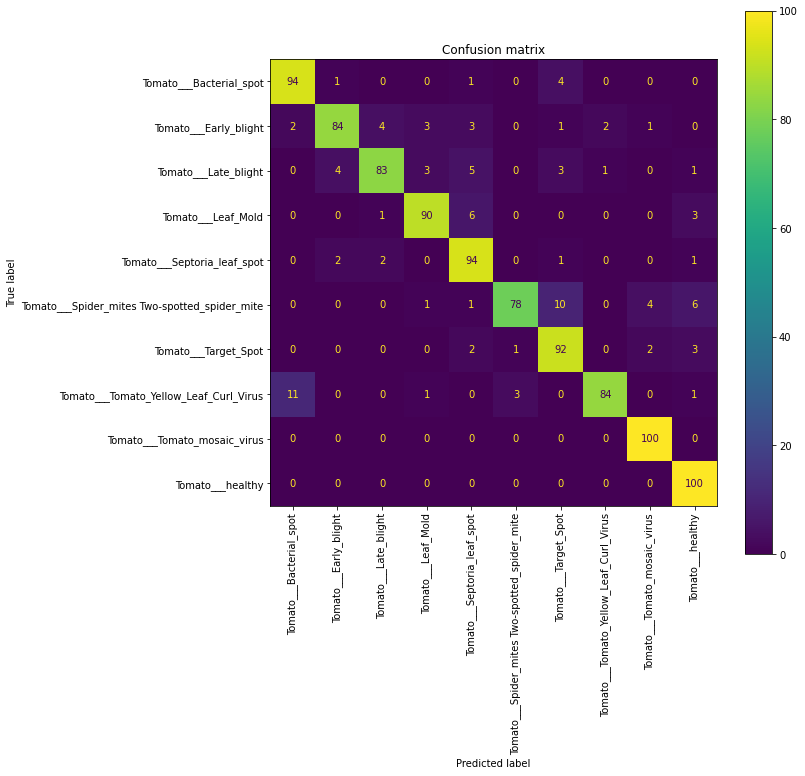

In [38]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(test_labels_name, y_pred_CNN_name)
print(cf_matrix)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cmp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=labels.values())
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion matrix")
cmp.plot(ax=ax,xticks_rotation='vertical')
plt.savefig('ConfusionMatrix')

In [42]:
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Tomato_mosaic_virus/000ec6ea-9063-4c33-8abe-d58ca8a88878___PSU_CG 2169.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Septoria_leaf_spot/0a76257e-6a78-459b-8f51-a266805121eb___Matt.S_CG 2527.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1b7cabad-63f8-4022-8133-e972c9600b56___YLCV_NREC 2726.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/1cd0ab0b-f4cf-4f2f-960a-455de4cd4c1e___YLCV_GCREC 2897.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___healthy/0b330273-890c-4995-af72-cba070fc0061___GH_HL Leaf 312.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Late_blight/0b988f87-fdce-40ba-aa09-7e6c9e1d6d30___GHLB_PS Leaf 21 Day 8.jpg" #rigth
image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Bacterial_spot/0da838ea-fd8c-43c0-a437-4aba96234262___UF.GRC_BS_Lab Leaf 8770.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Septoria_leaf_spot/02ab6821-757a-401b-ac04-919fdceee1f0___Matt.S_CG 1653.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Target_Spot/0c2bd887-092f-410d-ac56-9b96110665c8___Com.G_TgS_FL 8285.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Target_Spot/0fe7d644-dc8b-49f7-9a41-33ec029f6437___Com.G_TgS_FL 8274.JPG" #wrong
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Target_Spot/1c986ad6-8c08-4b6e-ac23-184d3d8d84fa___Com.G_TgS_FL 8083.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Target_Spot/Tomato___Target_Spot_original_0fccb8d0-3f91-442c-8d74-6dbfb163f8a9___Com.G_TgS_FL 8365.JPG_8f9871ed-34db-4e52-99ef-161ff083b9bc.JPG"
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Leaf_Mold/Tomato___Leaf_Mold_original_0ed11606-167f-4951-9a07-ffaa7e2aa88a___Crnl_L.Mold 6831.JPG_f900bb01-72ed-4e15-9501-1b43450ec9eb.JPG" #right
# image="/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/Tomato___Early_blight/0ae44a6c-1213-4312-a11b-c7c5d4e585d0___RS_Erly.B 9442.JPG" #right

In [40]:
img = keras.utils.load_img(image,target_size=(256,256))
img_arr = np.expand_dims(keras.utils.img_to_array(img), axis=0)
datagen = ImageDataGenerator(rescale=1./255)
for batch in datagen.flow(img_arr, batch_size=1, save_to_dir='/content/', save_prefix='1_param', save_format='jpeg'):
    print(batch[0][0][0])
    im = batch[0]
    # plt.imshow(batch[0])
    # plt.show()
    break

[0.5058824 0.5058824 0.5137255]


1/1 [==============================] - 0s 21ms/step
['Tomato___Bacterial_spot']


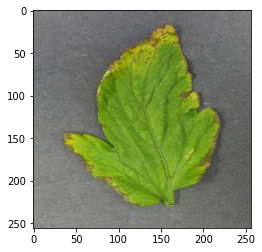

In [41]:
img_arr = np.expand_dims(keras.utils.img_to_array(im), axis=0)
# print(img_arr)
preds = CNN_model.predict(img_arr)
preds=np.argmax(preds, axis=1)
preds = [labels[k] for k in preds]
print(preds)
plt.imshow(img)

In [43]:
x,y = test_set.next()
y=np.argmax(y,axis=1) 

y_pred=CNN_model.predict(x)

y_pred_argmax=np.argmax(y_pred,axis=1) 

1/1 [==============================] - 0s 47ms/step


In [44]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in y_pred_argmax]
print("Pred: ",pred)
y = [labels[k] for k in y]
print("True: ",y)

Pred:  ['Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot']
True:  ['Tomato___Early_blight', 'Tomato___Late_b

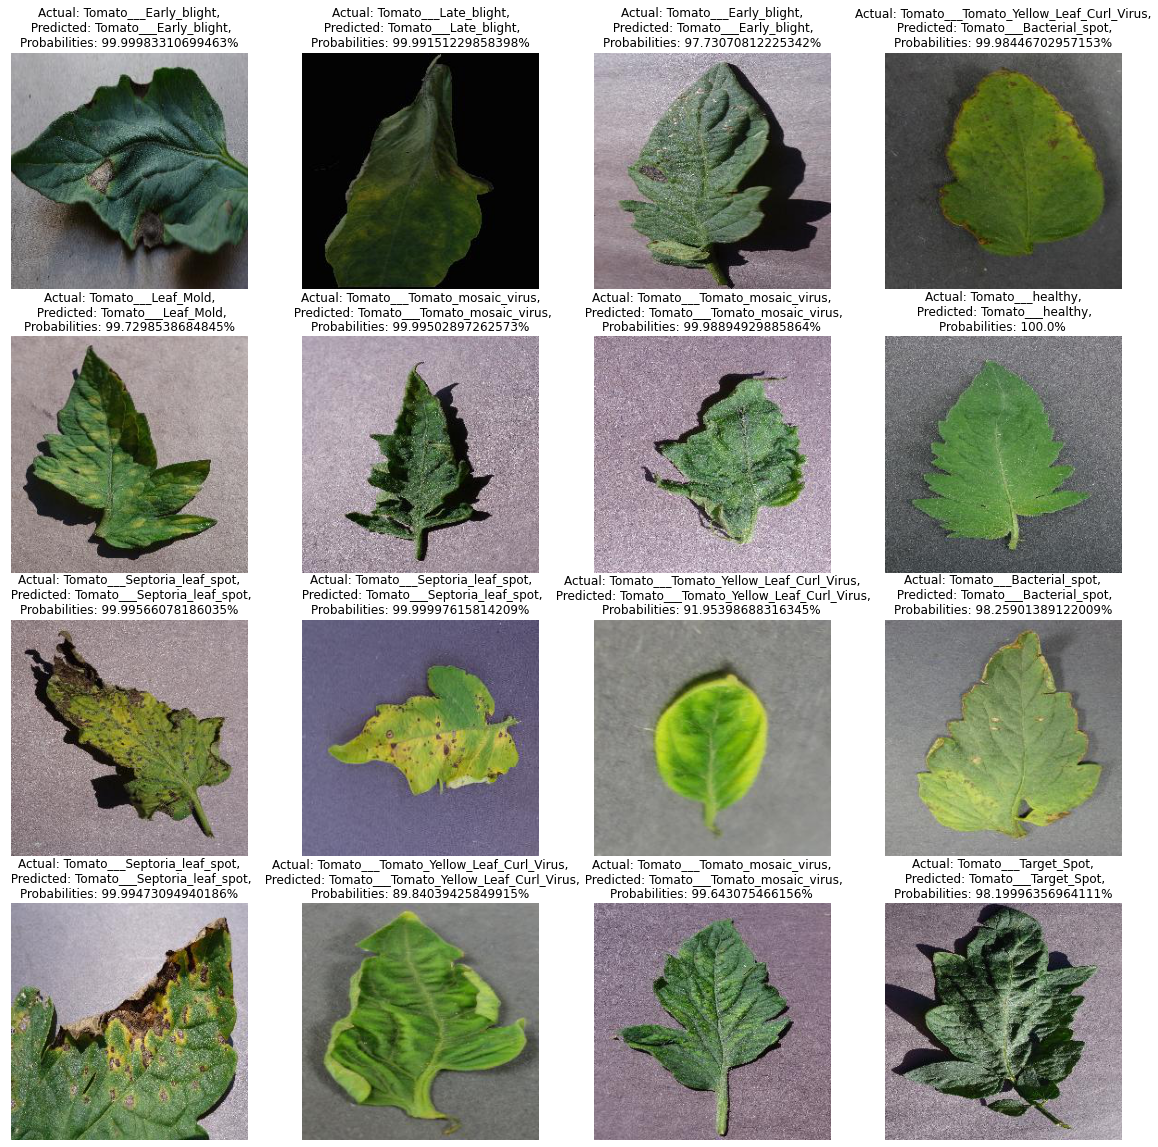

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(x[i])
  plt.title(f"Actual: {y[i]},\n Predicted: {pred[i]},\nProbabilities: {100 * (np.max(y_pred[i]))}%")
  plt.axis("off")

Saving 0d831ad9-bc2a-4168-bbf2-6030f3f886f2___Com.G_SpM_FL 9419.JPG to 0d831ad9-bc2a-4168-bbf2-6030f3f886f2___Com.G_SpM_FL 9419 (5).JPG
1/1 [==============================] - 0s 16ms/step
['Tomato___Septoria_leaf_spot']


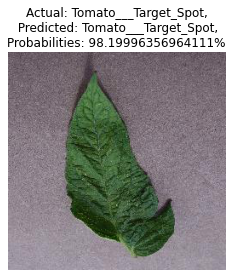

In [52]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = keras.utils.load_img(path, target_size=(256,256))
  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = CNN_model.predict(x)
  preds=np.argmax(preds, axis=1)
  preds = [labels[k] for k in preds]
  # print(preds)
  plt.imshow(img)
  plt.title(f"Actual: {y[i]},\n Predicted: {pred[i]},\nProbabilities: {100 * (np.max(y_pred[i]))}%")
  plt.axis("off")